In [ ]:
# import

import nltk
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import pickle
from sklearn.cluster import KMeans
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
titles = pd.read_pickle('/content/springer_dataframe_5_categories.p')
titles = titles['title']


In [ ]:

titles = titles.values.flatten().tolist()


In [ ]:
stopwords = set(word.strip() for word in open('stopwords.txt'))
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })

word_lemmatizer = WordNetLemmatizer()

In [ ]:
def tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t)>2]
    tokens = [word_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

In [ ]:
tokenizer('Artificial Intelligence: A Modern Approach (4th Edition)')

NameError: name 'tokenizer' is not defined

In [ ]:
word_2_int = {}
int_2_words = {}
ind = 0
error_count = 0

for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8') # this will throw exception if bad characters
        tokens = tokenizer(title)
        for token in tokens:
            if token not in word_2_int:
                word_2_int[token] = ind
                int_2_words[ind]=token
                ind += 1
    except Exception as e:
        print(e)
        print(title)
        error_count += 1

In [ ]:
error_count

0

In [ ]:
def tokens_2_vectors(tokens):
    X = np.zeros(len(word_2_int))
    for t in tokens:
        try:
            index = word_2_int[t]
            X[index]=1
        except:
            pass
    return X

In [ ]:
final_matrix = np.zeros((len(titles),len(word_2_int)))

for i in range(len(titles)):
    title = titles[i]
    token = tokenizer(title)
    final_matrix[i,:] = tokens_2_vectors(token)

svd = TruncatedSVD(n_components=2)
Z = svd.fit_transform(final_matrix)
Z.shape

(35271, 2)

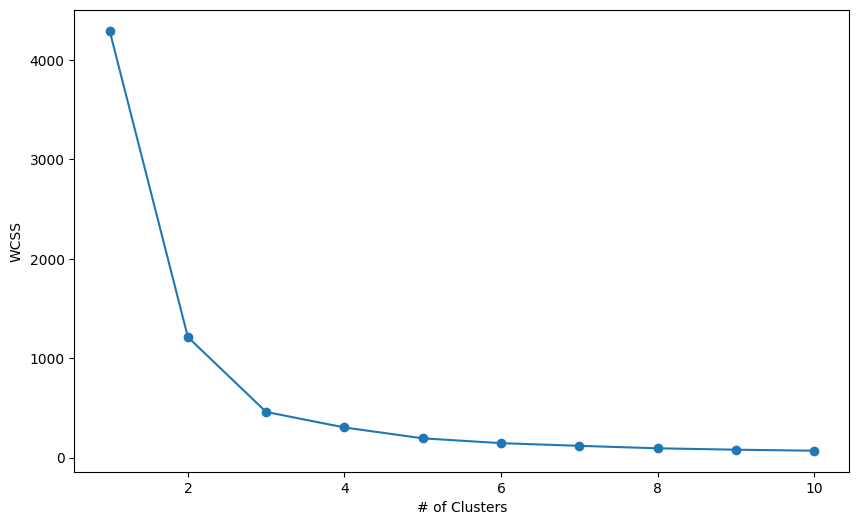

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(Z)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


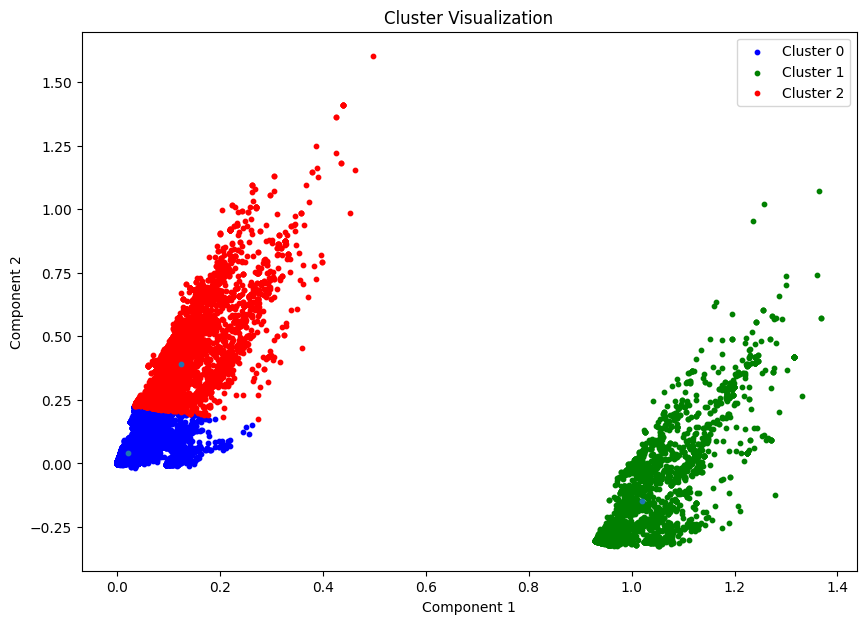

In [ ]:
# Apply k-means clustering
num_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(Z)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(10, 7))
colors = ['b', 'g', 'r']
for i in range(num_clusters):
    points = Z[labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=10, c=colors[i], label=f'Cluster {i}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=10)
plt.title('Cluster Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()
